In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import os
import scipy.stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# normal = st.norm.rvs(loc=100, scale=10, size=1000)

In [34]:
np.random.seed(100) # param dist
mean = 111
sigma = 22
N = 100

norm = np.random.normal(mean, sigma, N)

(array([  1.,   7.,   8.,  13.,  16.,  17.,  13.,  14.,   7.,   4.]),
 array([  56.28266623,   66.23053624,   76.17840625,   86.12627626,
          96.07414628,  106.02201629,  115.9698863 ,  125.91775631,
         135.86562633,  145.81349634,  155.76136635]),
 <a list of 10 Patch objects>)

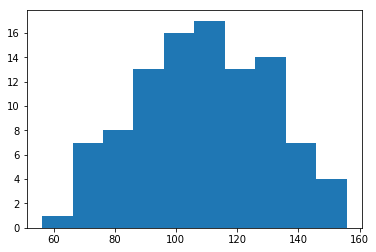

In [35]:
plt.hist(norm)

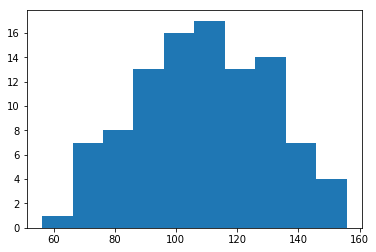

In [36]:
pl.hist(norm);

In [37]:
# random poission dist

np.random.seed(100)

lamda = mean

mydict = {}
mydict['pois'] = {} 
mydict['pois']['means'] = {}

for i in range(100):
    mydict['pois'][i] = np.random.poisson(lamda, size= N)

for q in mydict['pois']:
    if not type(q) == str:
        mydict['pois']['means'][q] = mydict['pois'][q].mean()
        
mymeans = mydict['pois']['means'].values()

In [38]:
#def calculate_z(norm, mu = 100, std = 10):
    #z = np.sqrt(len(norm)) * (mu-norm.mean())/(std)
    #return z

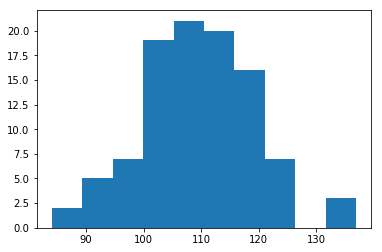

In [39]:
plt.hist(mydict['pois'][0]);

In [40]:
# calculate_z(norm)
#z = np.zeros(1000)
#np.random.seed(10)
#for i in range(0, 1000):
#    z[i] = (calculate_z(st.norm.rvs(loc = 100, scale = 10, size = 1000)))
    

In [41]:
def ztest(n): # z-test
    """Runs the z test"""
    z = (mean - n) / sigma * sqrt(n)
    return z

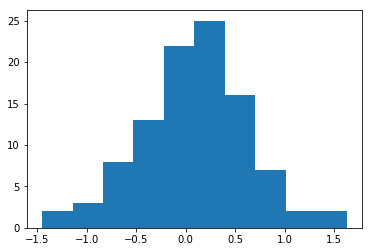

In [42]:
zscores = []

for n in mymeans:
    zscore = ztest(n)
    zscores.append(zscore)
    
plt.hist(zscores); # plot z scores

In [43]:
# Ho: sample of z score come from normal parent dist, alpha = 0.05

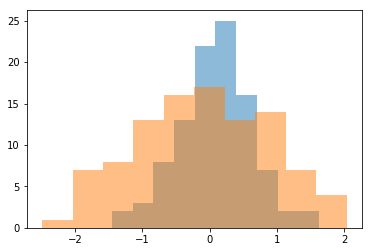

In [45]:
np.random.seed(100)
N_0 = np.random.normal(0, 1, 100)
plt.hist(zscores, alpha = .5)
plt.hist(N_0, alpha = .5);

In [46]:
# gaussian mean = 0, std dev = 1, high z score

In [49]:
print ("z-scores on normal", scipy.stats.kstest(zscores, 'norm'))


('z-scores on normal', KstestResult(statistic=0.18840587384145235, pvalue=0.0013961169772984672))


In [50]:
# ks test, p-value is 0.001, alpha was 0.05 we accept Ho

In [51]:
print ("z-scores on normal", scipy.stats.anderson(zscores, dist='norm'))

('z-scores on normal', AndersonResult(statistic=0.34040420357315782, critical_values=array([ 0.555,  0.632,  0.759,  0.885,  1.053]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])))


In [52]:
# AD test, critical val is 0.34, selected p value xxx we accept Ho